<a href="https://colab.research.google.com/github/ManavMoitra/neural-networks-from-scratch/blob/main/Sigmoid_Neuron_implementation_on_ToyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import ListedColormap

In [127]:
my_cmap=ListedColormap(["red", "violet", "blue"])

**CLASS FOR A SIGMOID NEURON**

In [128]:
class SigmoidNeuron:
  def __init__(self):
    self.W=0
    self.b=0

  def perceptron(self,x):
    return np.dot(x,self.W.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*(y_pred) *(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*(y_pred) *(1-y_pred)

  def fit(self,X,Y,epochs=1,learning_rate=0.01,initialise=True):
    if initialise:
      self.W=np.random.randn(1,X.shape[1])
      self.b=0

    for i in range(epochs):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.W=self.W-learning_rate*dw
      self.b=self.b-learning_rate*db






**FIT FOR TOY DATA**

In [129]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y=[1,1,1,0,0,0]

In [130]:
sn1=SigmoidNeuron()
sn1.fit(X,Y,epochs=1,learning_rate=0.1)

In [134]:
def plot_sn(X, Y, sn, levels=None): # Added levels argument
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val)).item()

    # Manually define contour levels to include extreme values
    levels = np.linspace(0, 1, 11)  # Create 11 levels from 0 to 1


    # Contour plot
    contour_plot = ax.contourf(XX1, XX2, YY, levels=levels, cmap=my_cmap, alpha=0.6)

    # Scatter plot for data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=my_cmap, edgecolors="black")

    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title("Sigmoid Neuron Decision Boundary")

    # Add colorbar
    plt.colorbar(contour_plot, ax=ax)
    plt.show()





In [135]:
print(sn1.W,sn1.b)

[[-1.03041285 -0.39435754]] [0.08261911]


[[ 0.10138    -0.77763879]] [0.00905284]


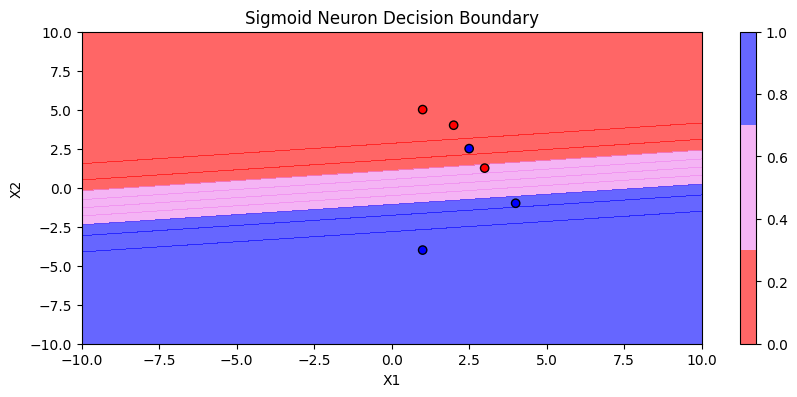

[[ 0.20691478 -0.71615401]] [0.04647001]


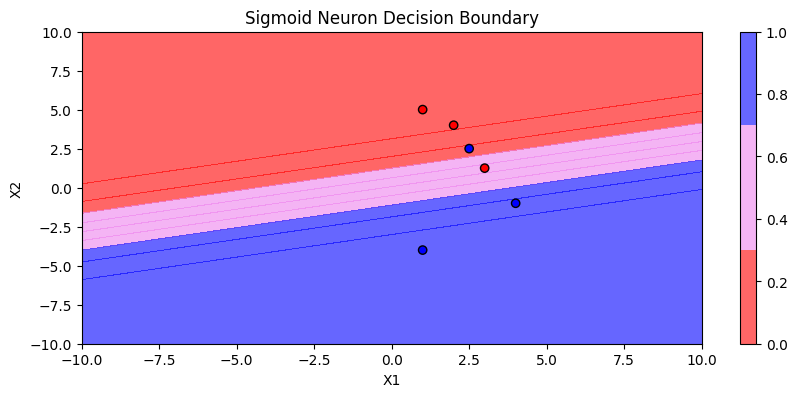

[[ 0.25394323 -0.64587591]] [0.06861233]


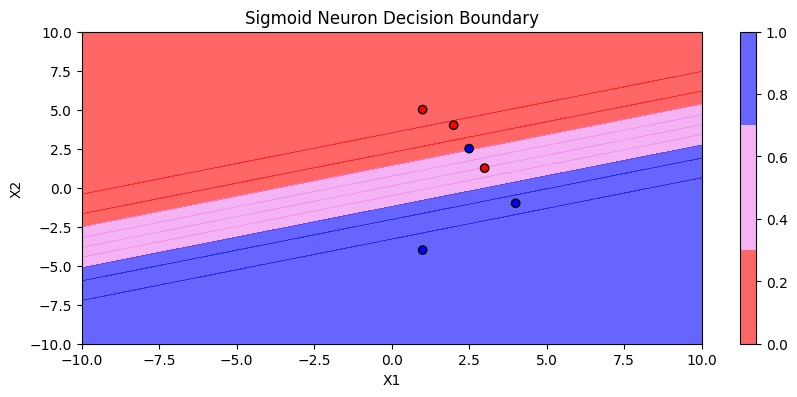

[[ 0.27278717 -0.5883815 ]] [0.08178022]


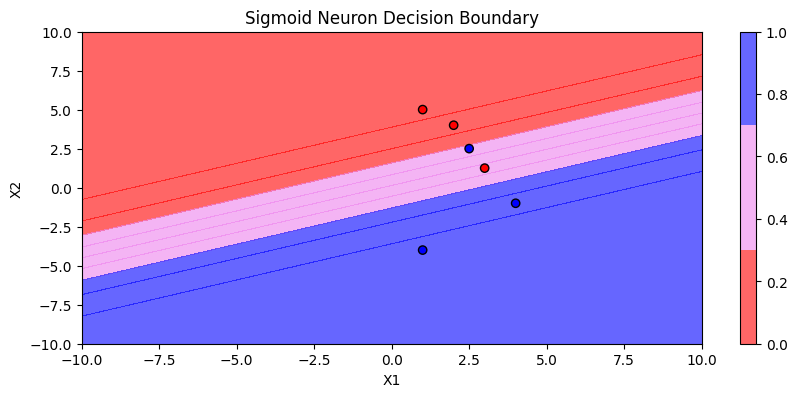

[[ 0.27329947 -0.55380958]] [0.08771203]


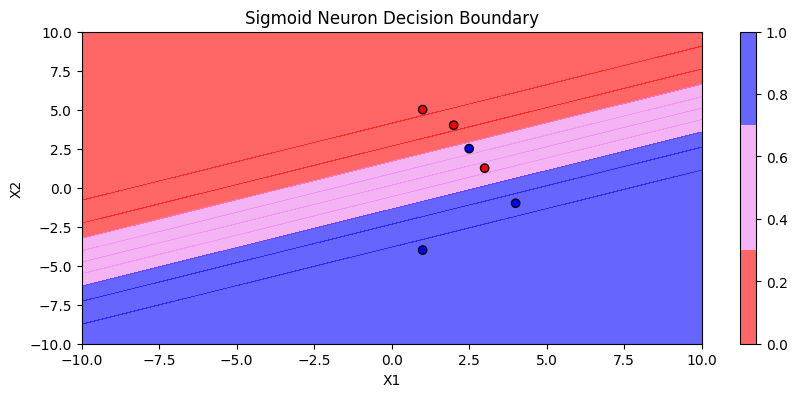

[[ 0.26615011 -0.5373195 ]] [0.08989857]


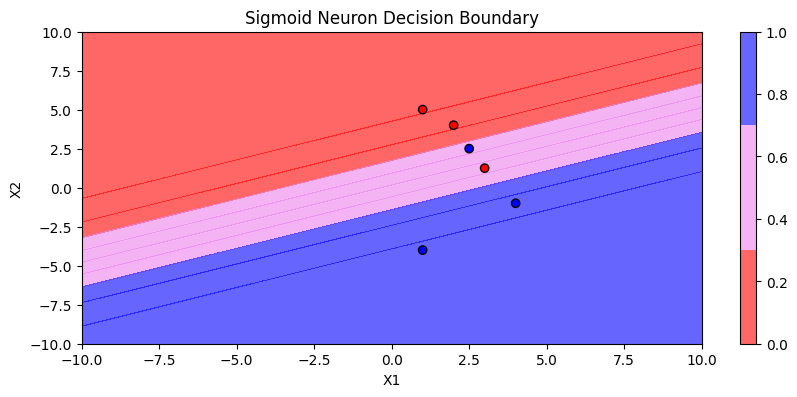

[[ 0.25908862 -0.52932602]] [0.09145055]


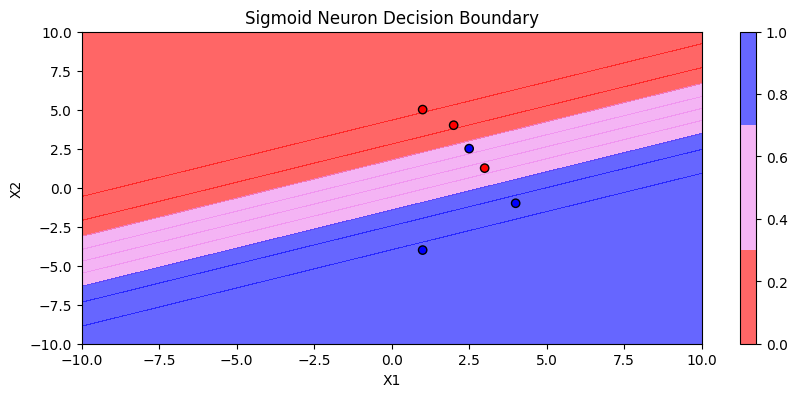

[[ 0.25408117 -0.52498382]] [0.09334718]


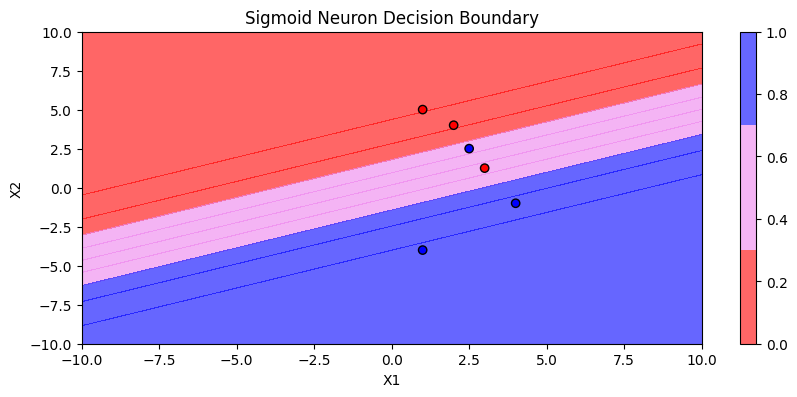

[[ 0.25072572 -0.52255109]] [0.09559569]


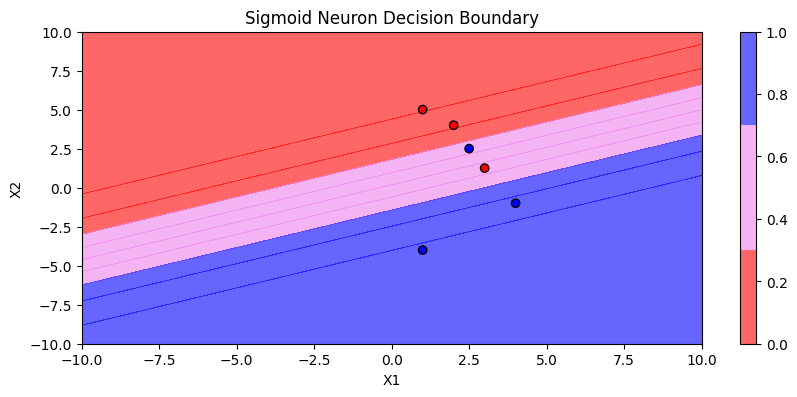

[[ 0.24841007 -0.52122507]] [0.09806627]


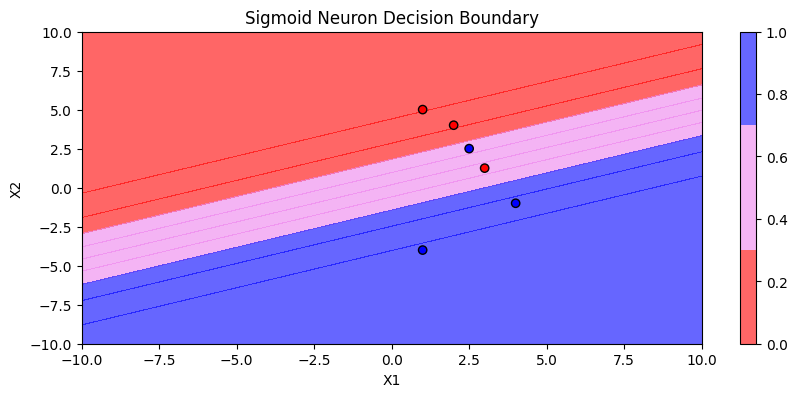

[[ 0.24671189 -0.52054696]] [0.10066201]


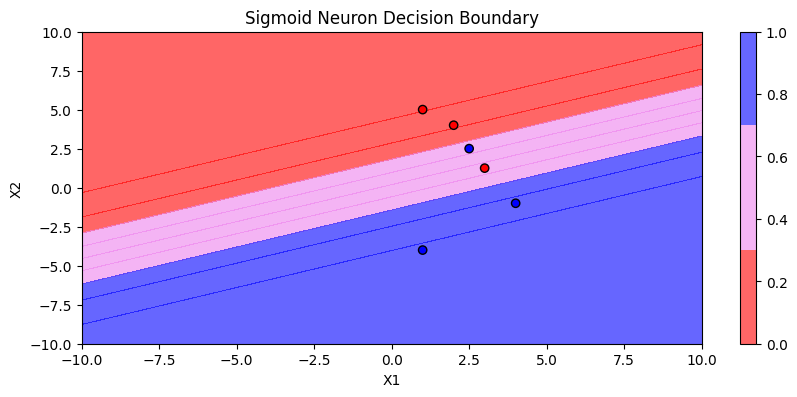

[[ 0.24537443 -0.52024473]] [0.1033235]


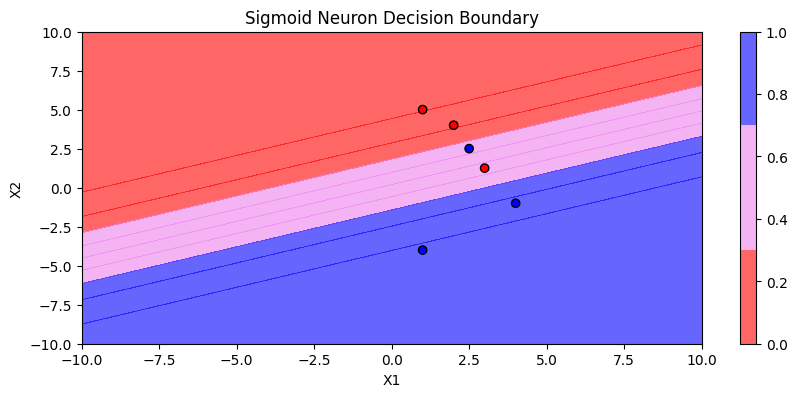

[[ 0.24424687 -0.52015879]] [0.10601589]


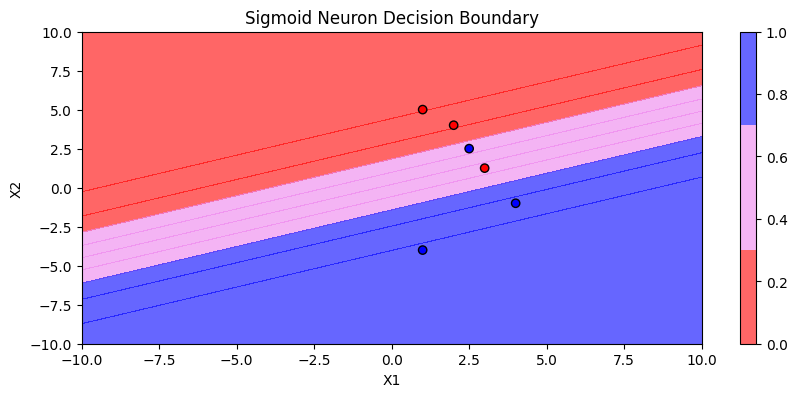

[[ 0.24324186 -0.52019662]] [0.10871909]


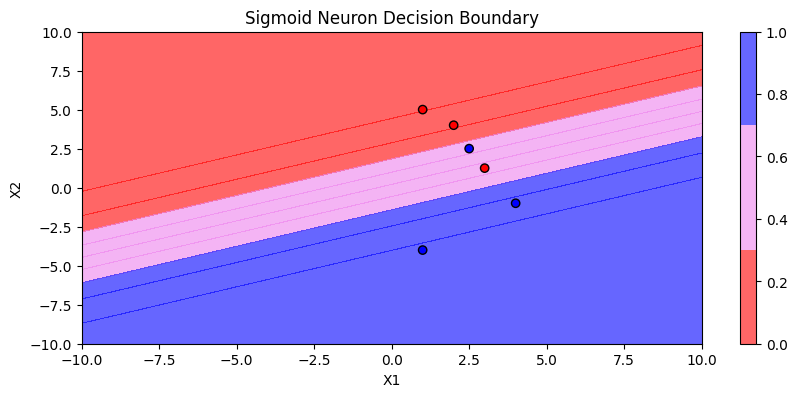

[[ 0.24230918 -0.52030497]] [0.11142162]


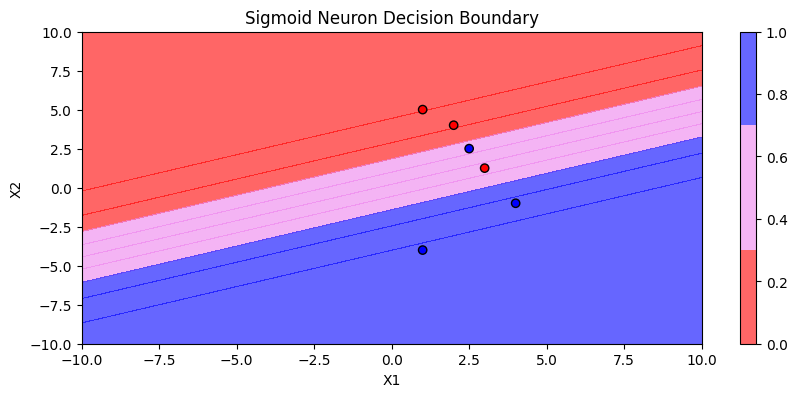

[[ 0.24142002 -0.52045333]] [0.11411698]


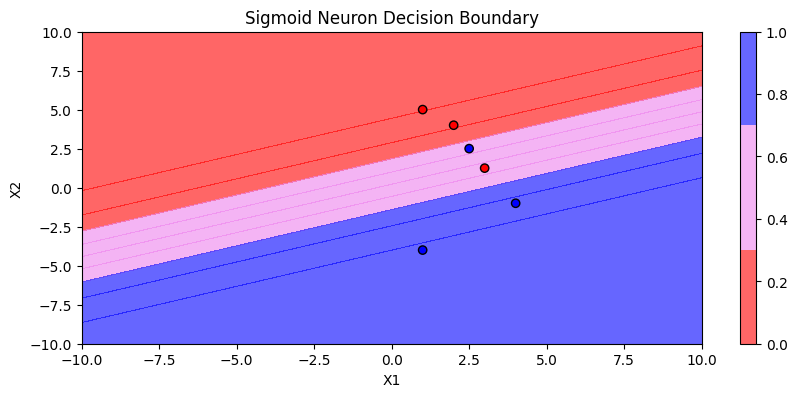

[[ 0.24055792 -0.52062425]] [0.11680154]


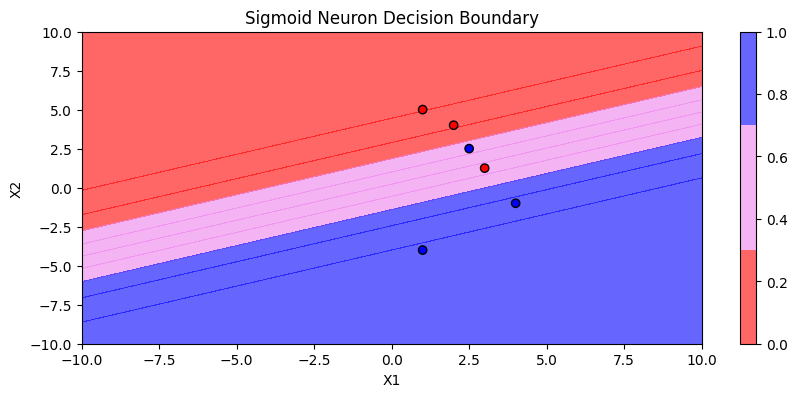

[[ 0.23971345 -0.52080777]] [0.11947327]


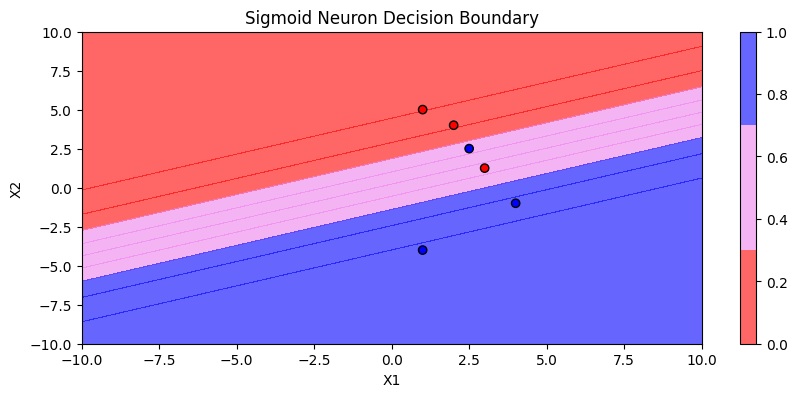

[[ 0.23888122 -0.52099822]] [0.12213108]


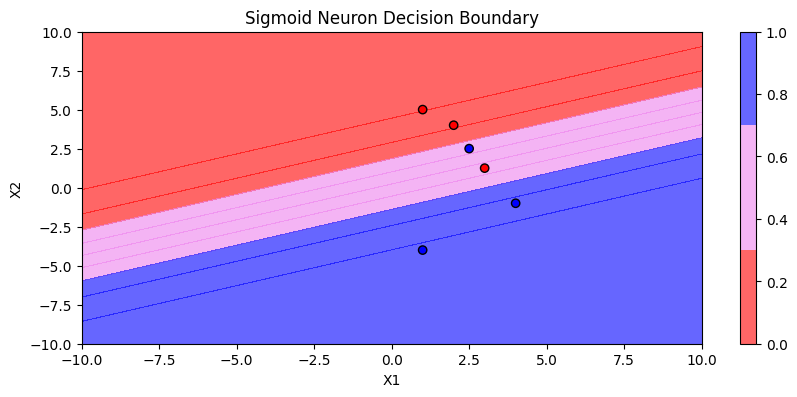

[[ 0.23805813 -0.52119234]] [0.12477442]


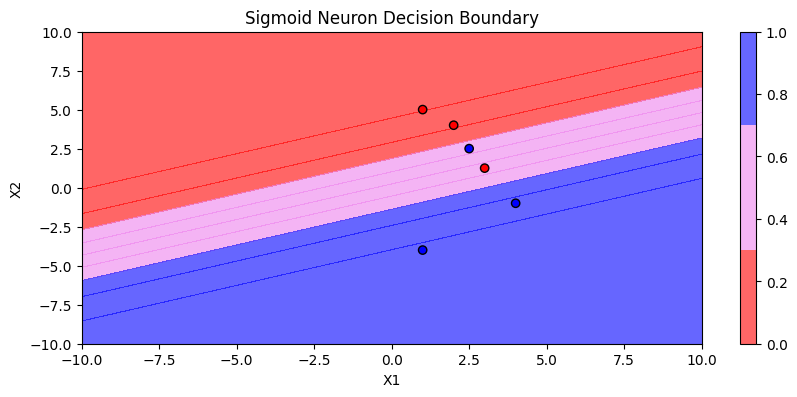

[[ 0.23724239 -0.5213883 ]] [0.12740303]


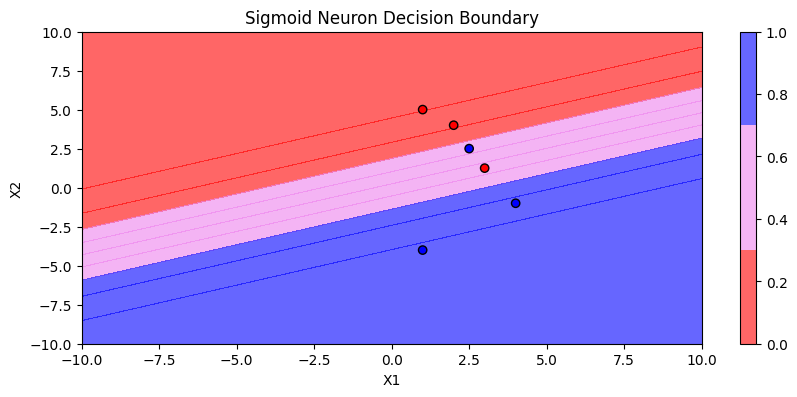

[[ 0.23643297 -0.52158504]] [0.13001681]


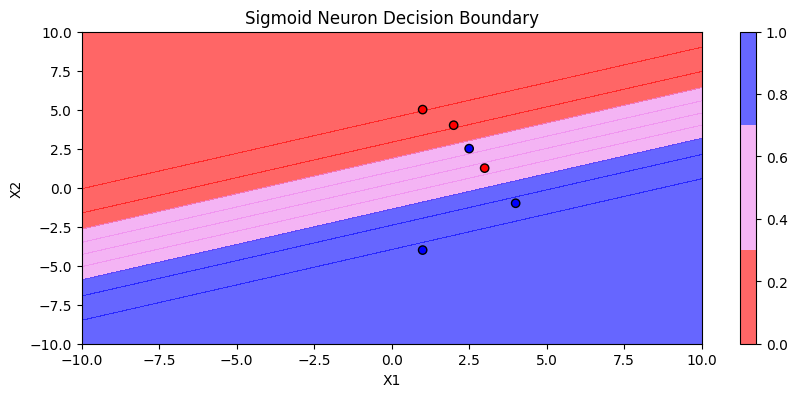

[[ 0.23562924 -0.52178195]] [0.13261578]


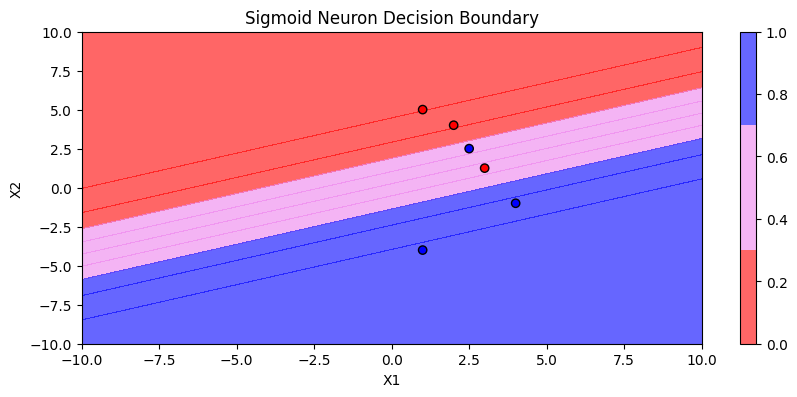

[[ 0.23483084 -0.52197869]] [0.13519998]


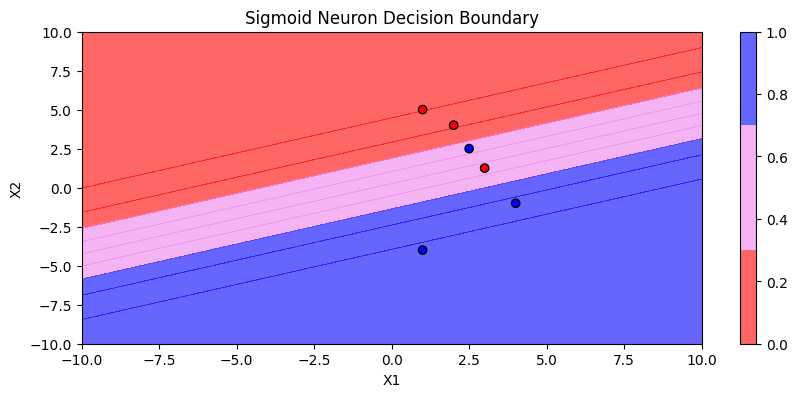

[[ 0.23403754 -0.52217507]] [0.13776952]


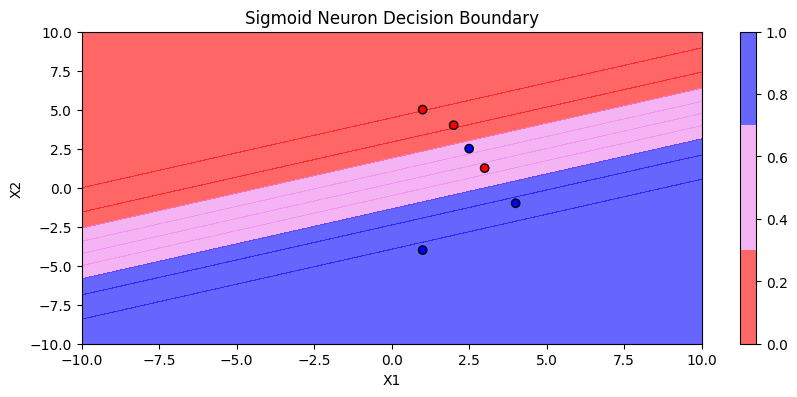

[[ 0.23324919 -0.52237097]] [0.14032449]


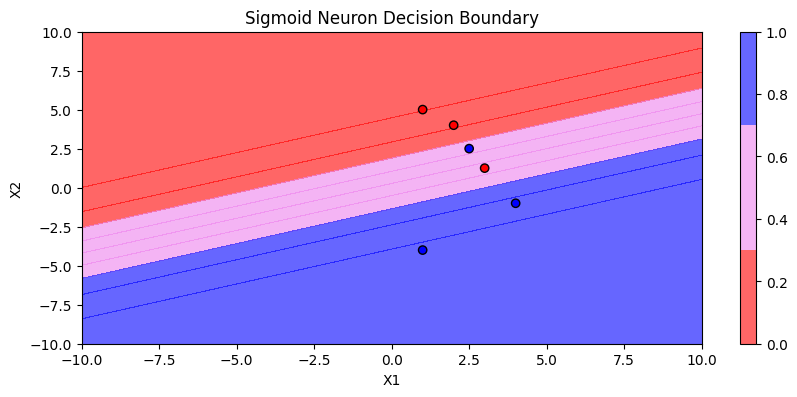

[[ 0.23246568 -0.52256634]] [0.14286502]


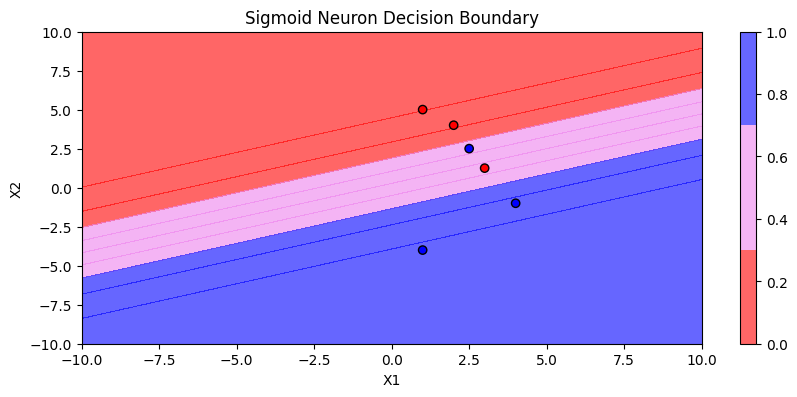

[[ 0.23168693 -0.52276113]] [0.14539122]


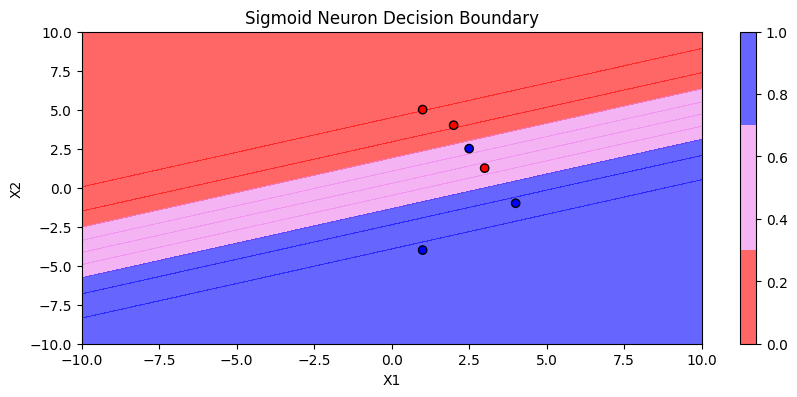

[[ 0.23091288 -0.52295532]] [0.14790321]


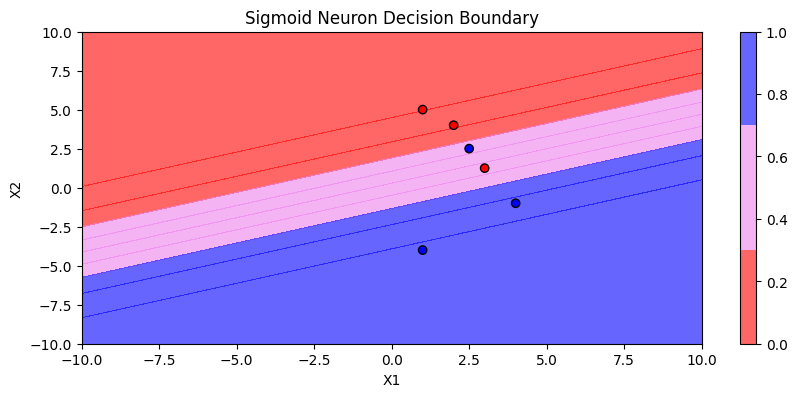

[[ 0.23014347 -0.52314891]] [0.15040112]


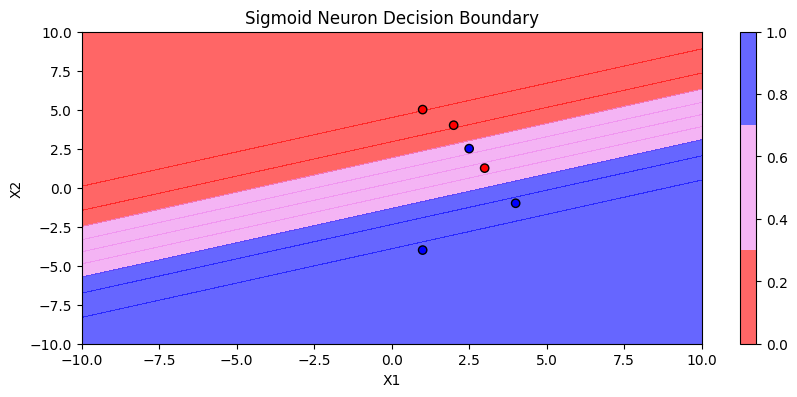

In [140]:
sn1.fit(X,Y,epochs=1,learning_rate=0.5,initialise=True)
N=30
for i in range(N):
    plt.figure(figsize=(10,N*5))
    print(sn1.W, sn1.b)
    ax=plt.subplot(N+1,1,i+2)
    # Example usage of levels argument
    plot_sn(X, Y, sn1,ax)
    sn1.fit(X, Y, 1, 0.5, False)
